# import packages

In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
data_dir = './data/faces/img_align_celeba/data'

# Define the parameters for image loading and preprocessing
data_gen_obj = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to the range [0, 1]
    rotation_range=20,  # Randomly rotate images within the range of 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by 20% of the image width
    height_shift_range=0.2,  # Randomly shift images vertically by 20% of the image height
    shear_range=0.2,  # Apply shear transformation with a range of 20 degrees
    zoom_range=0.2,  # Apply random zoom with a range of 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Use the nearest pixel value for filling newly created pixels
)
data_gen_obj

In [3]:
# Load and preprocess the training images
train_generator = data_gen_obj.flow_from_directory(
    data_dir,  # Path to the training images directory
    target_size=(224, 224),  # Resize images to the desired size
    batch_size=32,  # Number of images to load and preprocess in each batch
    # class_mode='categorical'  # Specify the type of labels (e.g., binary, categorical)
)

next(train_generator)

Found 0 images belonging to 0 classes.


(array([], shape=(0, 224, 224, 3), dtype=float32),
 array([], shape=(0, 0), dtype=float32))

## use, PIL to load images

In [4]:
from PIL import Image
import numpy as np
import os

loaded_images = list()


for image_name in os.listdir(data_dir):
    image_path = os.path.join(data_dir,image_name)
    # print(image_path)
    if image_path.endswith((".jpg", ".png", ".jpeg")):
        image = Image.open(image_path)
        image = image.resize((224, 224)) # scale to format size
        image = np.array(image) / 255.0
        loaded_images.append(image)
loaded_images = np.array( loaded_images)
print(loaded_images.shape)
loaded_images[0][0][:5]

(1105, 224, 224, 3)


array([[0.85882353, 0.8745098 , 0.92156863],
       [0.85882353, 0.8745098 , 0.92156863],
       [0.85882353, 0.8745098 , 0.92156863],
       [0.85882353, 0.8745098 , 0.92156863],
       [0.85490196, 0.87058824, 0.91764706]])

In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Bidirectional, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import plot_model, save_img

num_classes = 2
image_height = 224
image_width = 224
channels = 3
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Add Dropout layer with a rate of 0.5
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(patience=3)  # Stop training if the validation loss doesn't improve for 3 epochs

# Train the model with early stopping
# model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val), callbacks=[early_stopping])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 64)                25233472  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                        

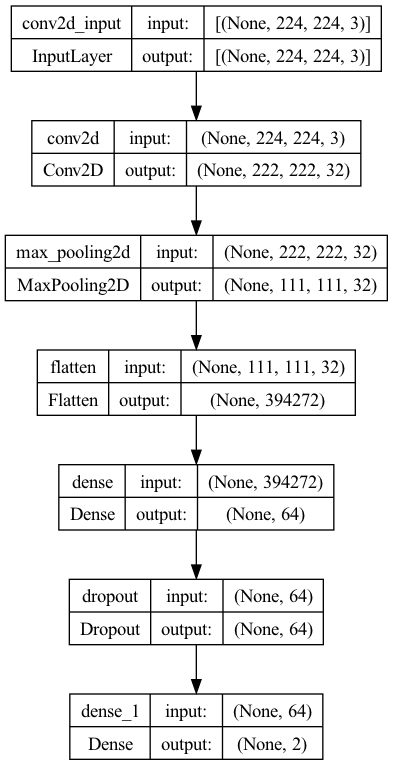

In [7]:
plot_model(model, to_file='model_architecture.png', show_shapes=True)

In [8]:
from keras.datasets import cifar10

In [36]:
(x_train, y_train), (_,_) = cifar10.load_data()

In [37]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [38]:
number_samples = 20000

In [40]:
x_train = x_train[: number_samples]
y_train = y_train[: number_samples]

In [45]:
print(x_train.shape)
print(y_train.shape)

(20000, 32, 32, 3)
(20000, 1)


numpy.ndarray

In [46]:
# save to files.
np.save("cifer10_x_train.npy", x_train)
np.save("cifer10_y_train.npy", y_train)